Based on these posts: 
* https://medium.com/@chrisfotache/text-classification-in-python-pipelines-nlp-nltk-tf-idf-xgboost-and-more-b83451a327e0
* https://github.com/keisukeirie/Amazon_review_helpfulness_prediction
* https://stackabuse.com/text-classification-with-bert-tokenizer-and-tf-2-0-in-python/
* https://towardsdatascience.com/simple-bert-using-tensorflow-2-0-132cb19e9b22

In [3]:
!pip install -q boto3
!pip install -q scikit-learn==0.20.3

tensorflow 2.0.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
tensorflow 2.0.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.3 which is incompatible.
awscli 1.18.20 has requirement botocore==1.15.20, but you'll have botocore 1.15.23 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
tensorflow 2.0.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
tensorflow 2.0.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.3 which is incompatible.
awscli 1.18.20 has requirement botocore==1.15.20, but you'll have botocore 1.15.23 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading v

In [4]:
import boto3
import sagemaker
import pandas as pd

sess   = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name='sagemaker', region_name=region)

In [5]:
!aws s3 cp 's3://{bucket}/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz' ./data/

download: s3://sagemaker-us-east-1-835319576252/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz to data/amazon_reviews_us_Digital_Software_v1_00.tsv.gz


In [6]:
import csv

df = pd.read_csv('./data/amazon_reviews_us_Digital_Software_v1_00.tsv.gz', 
                 delimiter='\t', 
                 quoting=csv.QUOTE_NONE,
                 compression='gzip')
df.shape

(102084, 15)

In [7]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


In [8]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


# Drop any NaNs

In [9]:
df.shape

(102084, 15)

In [10]:
df.isna().values.any()

False

In [11]:
df_cleaned_and_filtered = df.dropna()
df_cleaned_and_filtered = df_cleaned_and_filtered.reset_index()
df_cleaned_and_filtered.shape

(102084, 16)

In [12]:
df_cleaned_and_filtered['is_positive_sentiment'] = (df_cleaned_and_filtered['star_rating'] >= 4).astype(int)
df_cleaned_and_filtered.head(5)

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,is_positive_sentiment
0,0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31,1
1,1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31,0
2,2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31,0
3,3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31,1
4,4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31,1


### You may need to run this next cell twice

In [13]:
import seaborn as sns

sns.countplot(x='is_positive_sentiment', data=df_cleaned_and_filtered)


## Balance the dataset

In [14]:
from sklearn.utils import resample

is_negative_sentiment_df = df_cleaned_and_filtered.query('is_positive_sentiment == 0')
is_positive_sentiment_df = df_cleaned_and_filtered.query('is_positive_sentiment == 1')

is_positive_downsampled_df = resample(is_positive_sentiment_df,
                                      replace = False, # sample without replacement
                                      n_samples = len(is_negative_sentiment_df), # match minority n
                                      random_state = 27) # reproducible results

df_cleaned_and_filtered = pd.concat([is_negative_sentiment_df, is_positive_downsampled_df])


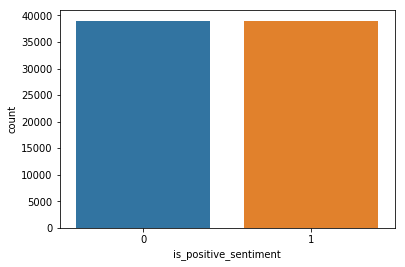

In [15]:
sns.countplot(x='is_positive_sentiment', data=df_cleaned_and_filtered)


### BERT
MultiLabel Classification:  https://towardsdatascience.com/multi-label-classification-using-bert-roberta-xlnet-xlm-and-distilbert-with-simple-transformers-b3e0cda12ce5

BinaryClassification:  https://towardsdatascience.com/simple-transformers-introducing-the-easiest-bert-roberta-xlnet-and-xlm-library-58bf8c59b2a3

Install simpletransformers based on the Transformers library by HuggingFace:  https://github.com/ThilinaRajapakse/simpletransformers/

In [16]:
!pip install simpletransformers==0.22.1

tensorflow 2.0.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
tensorflow 2.0.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.3 which is incompatible.
awscli 1.18.20 has requirement botocore==1.15.20, but you'll have botocore 1.15.23 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
!pip install tensorboardx==2.0

tensorflow 2.0.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
tensorflow 2.0.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.3 which is incompatible.
awscli 1.18.20 has requirement botocore==1.15.20, but you'll have botocore 1.15.23 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [52]:
!pip install torch==1.4.0 torchvision==0.5.0

tensorflow 2.0.0 requires opt-einsum>=2.3.2, which is not installed.
tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
tensorflow 2.0.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.3 which is incompatible.
awscli 1.18.20 has requirement botocore==1.15.20, but you'll have botocore 1.15.23 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Prepare the dataset for BERT.

By `simpletransformer` convention, the dataframe must have 2 columns:
* `text`
* `labels`

In [53]:
df_bert = df_cleaned_and_filtered[['review_body', 'is_positive_sentiment']]
df_bert.columns = ['text', 'labels']
df_bert.head(5)

,text,labels
1,Needs a little more work.....,0
2,Please cancel.,0
6,The variations created by Win10 induced this p...,0
7,Horrible! Would not upgrade previous version ...,0
8,Waste of time .,0


In [54]:
df_bert = df_bert[:10000]
df_bert.shape

(10000, 2)

### Split the data into train and test.  

In [55]:
from sklearn.model_selection import train_test_split

df_bert_train, df_bert_test = train_test_split(df_bert, test_size=0.10)

df_bert_train.shape

(9000, 2)

In [59]:
df_bert_test.shape

(1000, 2)

### Train the model

In [60]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel

args = {
   'output_dir': 'outputs/',
   'cache_dir': 'cache/',
   'fp16': False,
   'max_seq_length': 128,
   'train_batch_size': 8,
   'eval_batch_size': 8,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 1,
   'weight_decay': 0,
   'learning_rate': 3e-5,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,
   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,
   'tensorboard_dir': 'runs',
   'overwrite_output_dir': True,
   'reprocess_input_data': False,
}

bert_model = ClassificationModel(model_type='distilbert', # bert, distilbert, etc, etc.
                                 model_name='distilbert-base-cased',
                                 args=args,
                                 use_cuda=False)

bert_model.train_model(train_df=df_bert_train,
                       eval_df=df_bert_test,
                       show_running_loss=True)

Running loss: 0.008464

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000505

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000327

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000166

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000102

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000089

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000073

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000062

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000036

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000038

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000025

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000031

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000019

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000019

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000032

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000025

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000013

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000017

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000011

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000015

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000014

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000014

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000012



In [63]:
#import sklearn

#blah, result, model_outputs, wrong_predictions = bert_model.eval_model(eval_df=df_bert_test, acc=sklearn.metrics.accuracy_score)

# result = bert_model.eval_model(eval_df=df_bert_test, acc=sklearn.metrics.accuracy_score)

In [66]:
predictions, raw_outputs = bert_model.predict(["""Love it!"""])

print('Predictions: {}'.format(predictions))
print('Raw outputs: {}'.format(raw_outputs))


Predictions: [0]
Raw outputs: [[ 5.0422106 -6.0365953]]


In [67]:
predictions, raw_outputs = bert_model.predict(["""That movie was absolutely awful."""])

print('Predictions: {}'.format(predictions))
print('Raw outputs: {}'.format(raw_outputs))


Predictions: [0]
Raw outputs: [[ 5.1175714 -6.1171227]]
